# Markowitz model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import scipy.optimize
import sys
sys.path.append('..')
from pyQuafi.models import markowitz

## Introduction

The Markowitz model is a method optimize a given portfolio, either in terms of minimizing risk for a given return or maximizing return for a given risk. For a portfolio comprising of a set of assets (here we will only consider stocks), the Markowitz model gives the best asset distribution (weights). Optimality is quantified by the Sharpe ratio defined as 
\begin{equation*}
\text{Sharpe ratio} = \frac{\text{Return}}{\text{Risk}}.
\end{equation*}
Higher the Sharpe ratio, the better. Here, we calculate the mean annual return of a asset $i$ using
\begin{equation*}
R_i = \text{Mean daily returns of $i$} \times \text{Number of trading days in a year}.
\end{equation*}
Portfolio returns is then
\begin{equation*}
R_\text{p} = \bm{w}\cdot\bm{R}
\end{equation*}
where $\bm{w}$ is the vector of weights and $\bm{R}$ is the vector containing annual returns.
The risk is estimated through the covariance matrix as
\begin{equation*}
\text{Risk} = \bm{w}^\top\cdot\Sigma\cdot\bm{w}
\end{equation*}
where $\Sigma$ is the covariance matrix. Here's where diversification helps. Larger the diversification in the portfolio, smaller the covariance between any two assets and smaller the risk.

## Optimize portfolio

We will generate multiple asset distributions and maximize the Sharpe ratio to obtain the optimal asset distribution.

Optimal portfolio weights: {'AAPL': 0.275, 'TSLA': 0.225, 'AMZN': 0.007, 'NVDA': 0.493, '^GSPC': 0.0}


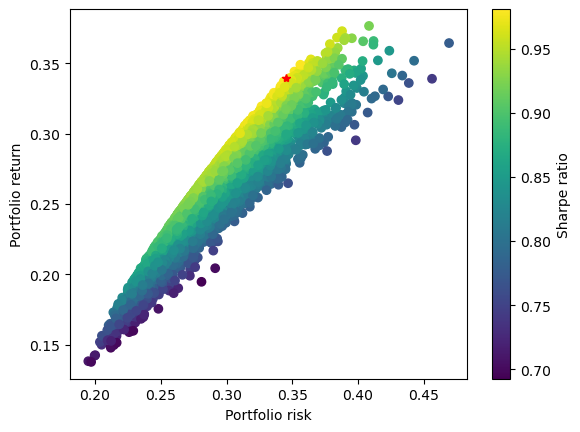

In [4]:
# Define assets in the portfolio (use Yahoo ticker symbol)
stocks = ['AAPL','TSLA','AMZN','NVDA','^GSPC']

# Historical period to consider in the model
start = '2013-01-01'
end = '2023-01-01'

# Average number of trading days in a year
tradingDays = 252

# Number of sample portfolios to generate
numberPortfolios = 10000

# Create instance of Markowitz class
M = markowitz.Markowitz(stocks, start, end, tradingDays, numberPortfolios)

# Generate multiple portfolios and calculate portfolio returns and risk
portfolioWeights, portfolioReturns, portfolioRisks, sharpe = M.generate_portfolios()

# Get the optimal portfolio by maximizing Sharpe ratio
bestReturn, bestRisk, bestSharpe = M.optimal_portfolio(portfolioWeights, M.calc_logReturns())

# Visualize risk and returns
fig = M.plot_portfolios(portfolioReturns, portfolioRisks, sharpe)
M.plot_best_portfolio(bestReturn, bestRisk)

